# Bayesian Data Analysis Final Project

---



**Topic: Bayesian Gaussian Mixture Models on Wisconsin Breast Cancer Dataset (Diagnostic)**

**Name: Prashil Negandhi**

**Problem Definition**

Using the Breast Cancer Wisconsin dataset, predict whether the cancer is benign or malignant. The Bayesian algorithm of choice is the Bayesian Mixture Models Algorithm. Explore whether this unsupervised learning algorithm can perform at par with supervised learning algorithms. 

**Executive Summary**

Using the Bayesian Mixture Model algorithm, I was able to achieve a classification accuracy of around 95%. Although, it is an unsupervised learning algorithm, it was able to beat the state-of-the-art supervised learning algorithm Support Vector Machines.

**Dataset Description**

Dataset has been obtained from UCI Machine Learning Repository.

ID number
Diagnosis (M = malignant, B = benign)
(3 - 32) :Ten real-valued features are computed for each cell nucleus: 
    radius (mean of distances from center to points on the perimeter)
    texture (standard deviation of gray-scale values)
    perimeter
    area 
    smoothness (local variation in radius lengths)
    compactness (perimeter^2 / area - 1.0)
    concavity (severity of concave portions of the contour)
    concave points (number of concave portions of the contour)
    symmetry
    fractal dimension ("coastline approximation" - 1)
		

**Importing the necessary libraries.**

In [0]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.metrics import confusion_matrix

**Load the Dataset ** 

In [0]:
df = read_csv("data.csv",header = 0)

**Preliminary Analysis of the Data**

In [3]:
print('The dataset has {} instances and {} attributes.\n'.format(df.shape[0], df.shape[1]))
print('The attributes are : \n {} '.format(df.dtypes))

The dataset has 569 instances and 33 attributes.

The attributes are : 
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst 

In [4]:
print('Class Distribution \n{}'.format(df.groupby('diagnosis').size()))

Class Distribution 
diagnosis
B    357
M    212
dtype: int64


**Data Cleaning**

In [5]:
df['diagnosis'], l = pd.factorize(df['diagnosis']) 
labels = df['diagnosis'].values
print("Shape of Labels = ", labels.shape)
df = df.drop(['diagnosis', 'id', 'Unnamed: 32'], 1)
X = df.values
print('Shape of Data = ', X.shape)

Shape of Labels =  (569,)
Shape of Data =  (569, 30)


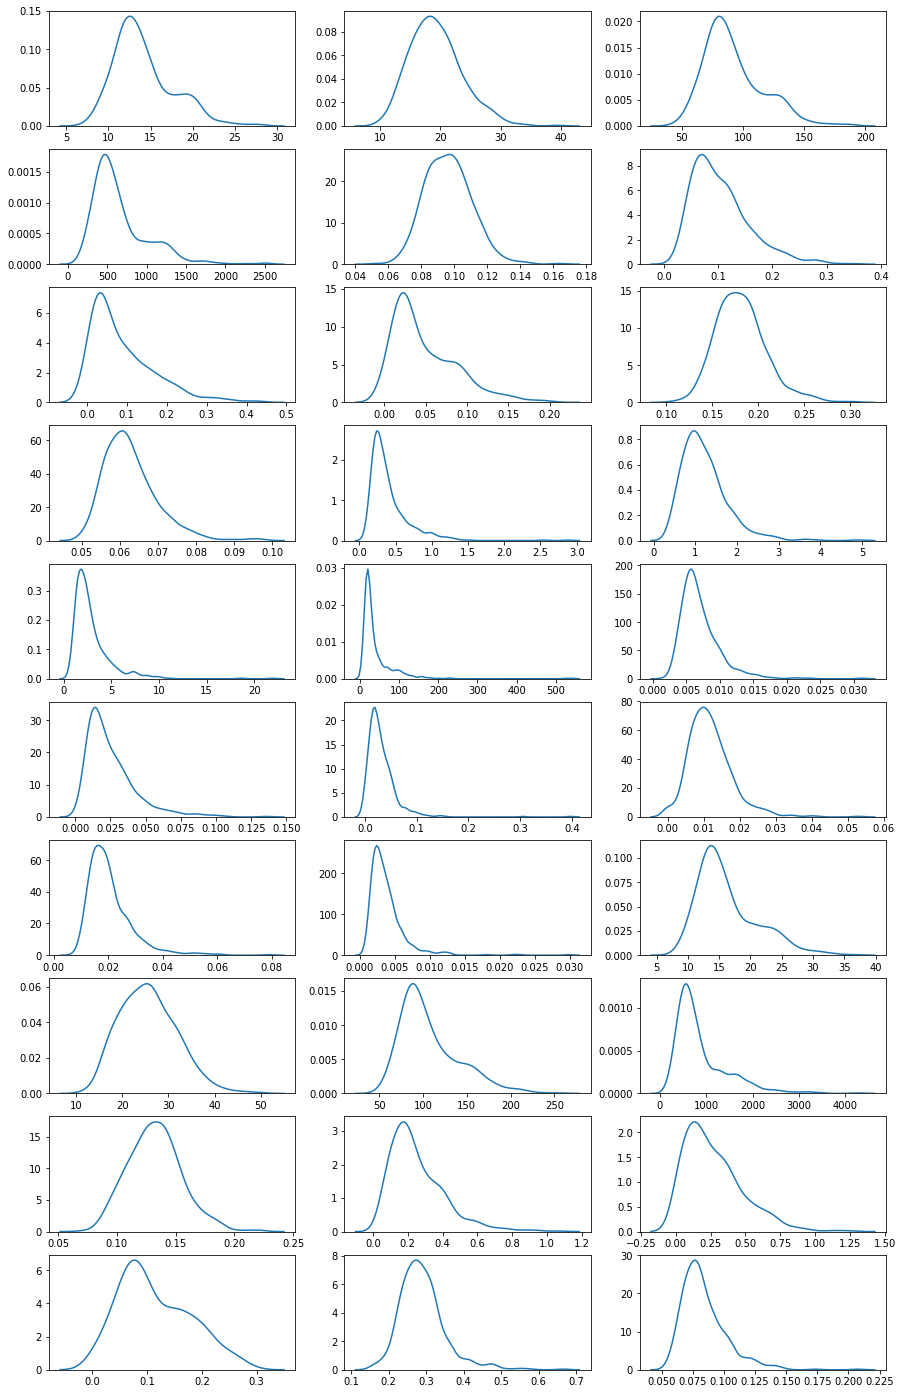

In [6]:
fig, axs = plt.subplots(10,3, figsize=(15, 25))
axs = axs.ravel()
x = np.arange(0, 569, 1)
for i in range(len(X[0])):
  sns.distplot(X[:,i], hist=False, ax=axs[i])
           

**As we can see, many of the features appear to be distributed as a mixture of 2 Gaussians. Thus, our initial approach to model the data as a Bayesian Gaussian Mixture Model might work.**

**Correlation between the Features**

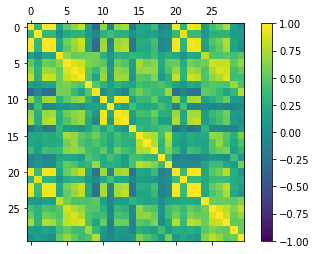

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none' )
fig.colorbar(cax)
plt.show()

There doesn't seem to be high correlation and feature selection might not be needed.

**Visualize the Data**

The data has been visualized by projecting it onto a lower dimension using PCA and tSNE.

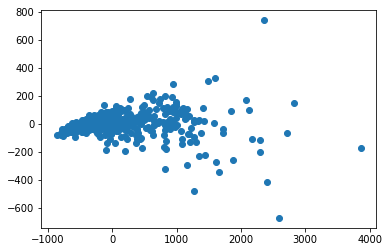

In [8]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X)
plt.scatter(pca_results[:,0], pca_results[:,1])

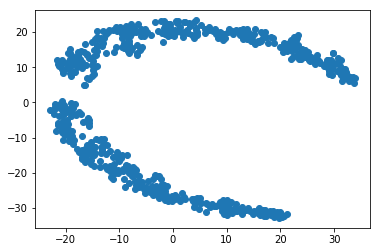

In [9]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X)
plt.scatter(tsne_results[:,0], tsne_results[:,1])

**We can get a feel that the data might be seperable using gaussian mixture models as we can see a clear seperation in out tSNE projection.**

**Construct the Model**

Number of Components will be the number of classes we have, that is 2 classes : Malignant and Benign.

In [0]:
bgm = mixture.BayesianGaussianMixture(n_components=2, covariance_type='full', weight_concentration_prior_type='dirichlet_distribution', weight_concentration_prior = 0.1).fit(X)

The Bayesian Gaussian Mixture class can adapt its number of mixture components automatically. The parameter weight_concentration_prior has a direct link with the resulting number of components with non-zero weights. Specifying a low value for the concentration prior will make the model put most of the weight on few components set the remaining components weights very close to zero. High values of the concentration prior will allow a larger number of components to be active in the mixture.

The Bayesian Gaussian Mixture class models with a Dirichlet distribution prior (weight_concentration_prior_type='dirichlet_distribution'). A Dirichlet distribution prior will favor more uniformly weighted components and therefore tends to divide natural clusters into unnecessary sub-components.

In [11]:
class_prediction = bgm.predict(X)

tn, fp, fn, tp = confusion_matrix(labels, class_prediction).ravel()
acc = (tp + tn) / (tp + fp + tn + fn)
sens = tp/(tp+fn)
spc = tn/(tn+fp)
prec = tp/(tp+fp)
print("Accuracy achieved = ", acc*100, "%")
print("Sensitivity achieved = ", sens*100, "%")
print("Specificity achieved = ", spc*100, "%")
print("Precision achieved = ", prec*100, "%")

Accuracy achieved =  95.2548330404218 %
Sensitivity achieved =  96.9187675070028 %
Specificity achieved =  92.45283018867924 %
Precision achieved =  95.58011049723757 %


**Comparision with state-of-the-art Support Vector Machines algorithm**

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.33)

In [13]:
clf = svm.SVC(gamma='scale')
clf.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
acc_svm = clf.score(X_test, Y_test)*100
print("Accuracy with SVM = ", acc_svm, "%")

Accuracy with SVM =  89.8936170212766 %


**Further Discussion**

This analysis of the Wisconsin Breast Cancer Data (Diagnostic) raises many questions. This is because the Bayesian Algorithm used to classify the data is an unsupervised learning algorithm. The Mixture Model was able to classify the dataset with a high degree of accuracy without needing any explicit labelling. It managed to find the inherent structure underlying the data. In this process it even beat state-of-the-art supervised learning algorithm Support Vector Machines.